In [1]:
import pandas as pd
from pandas_analysis import load_all_csv, IATA_TO_NAME
import matplotlib.pyplot as plt

In [6]:
data = load_all_csv()
data['departure_date'] = pd.to_datetime(data['departure_date'])
data = data.drop_duplicates(subset=['flight_id', 'departure_date'])
data['week_number'] = data['departure_date'].dt.isocalendar().week
unique_airlines = data['airline_iata_code'].unique()

,flight_id,flightnumber,departure_date,arrival_date,departure_time,arrival_time,duration,number_of_stops,airline_iata_code,departure_airport_iata_code,arrival_airport_iata_code,scrape_date,available_seats,price,week_number
0,<<<<<<< HEAD,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
1,FR_CRL_AGP_2023-05-10_FR1916,FR1916,2023-05-10,2023-05-10,06:45,09:30,02:45,0.0,FR,CRL,AGP,2023-05-09,3.0,200.99,19
2,FR_CRL_RHO_2023-05-10_FR8577,FR8577,2023-05-10,2023-05-10,13:10,17:45,03:35,0.0,FR,CRL,RHO,2023-05-09,3.0,113.13,19
3,FR_CRL_NAP_2023-05-10_FR1302,FR1302,2023-05-10,2023-05-10,16:35,18:50,02:15,0.0,FR,CRL,NAP,2023-05-09,3.0,110.61,19
4,FR_CRL_FAO_2023-05-10_FR6312,FR6312,2023-05-10,2023-05-10,16:20,18:15,02:55,0.0,FR,CRL,FAO,2023-05-09,2.0,206.99,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131604,HV_BRU_HER_2023-07-29_HV9211,HV9211,2023-07-29,2023-07-29,15:55,20:20,04:25,0.0,HV,BRU,HER,2023-04-24,-1.0,222.00,30
131611,HV_BRU_HER_2023-08-15_HV9209,HV9209,2023-08-15,2023-08-15,6:35,11:00,04:25,0.0,HV,BRU,HER,2023-04-24,-1.0,241.00,33
185239,HV_BRU_HER_2023-08-22_HV9209,HV9209,2023-08-22,2023-08-22,6:35,11:00,04:25,0.0,HV,BRU,HER,2023-05-06,4.0,161.00,34
194759,HV_BRU_FAO_2023-08-13_HV9011,HV9011,2023-08-13,2023-08-13,17:05,19:00,01:55,0.0,HV,BRU,FAO,2023-05-07,10.0,122.00,32


In [3]:
def plot_airline_chart(airline_data, airline_code):
    grouped_data = airline_data.groupby(['arrival_airport_iata_code', 'week_number']).size().reset_index(name='count')
    weekly_data = grouped_data.groupby('arrival_airport_iata_code')['count'].mean().reset_index()
    
    ax = weekly_data.plot(x='arrival_airport_iata_code', y='count', kind='bar', figsize=(8, 6))
    plt.ylabel('Aantal Vluchten per Week')
    plt.xlabel('Bestemming IATA Code')
    plt.title(f'Aantal Vluchten per Week voor {IATA_TO_NAME[airline_code]} per Bestemming')
    plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

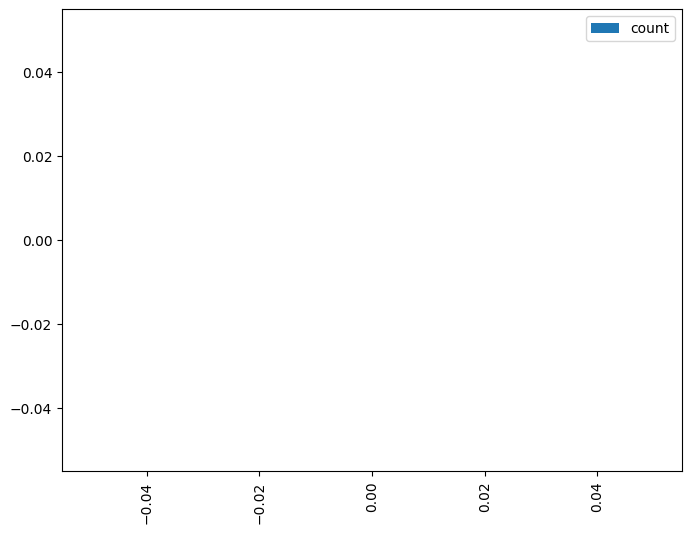

In [4]:
for airline_code in unique_airlines:
    airline_data = data[data['airline_iata_code'] == airline_code]
    plot_airline_chart(airline_data, airline_code)